In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

In [2]:
#Importing the data
dataset_train = pd.read_csv("D://New folder//ML//Completed//Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
#Creating a date structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [5]:
#Intializing the model
model = Sequential()

In [6]:
#Adding the relevant layers to the model
#First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

#Second LSTM Layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [7]:
#Adding the output (fully connected / dense) layer
model.add(Dense(units=1))

In [8]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#Fitting the model
with tf.device('/CPU'):
    model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 3s 41ms/step - loss: 0.0463
Epoch 2/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0045
Epoch 13/100
38/38 [=====

In [22]:
#Loading the real stock price of 2017
dataset_test = pd.read_csv('D://New folder//ML//Completed//Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

with tf.device('/CPU'):
    predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 309ms/step


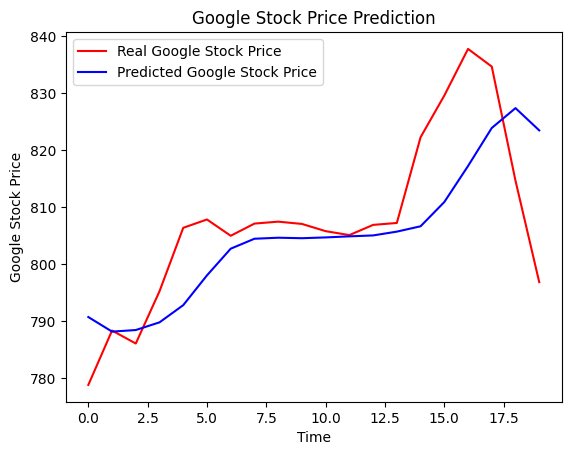

In [25]:
#Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()